# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

The score I would get for just guessing would be 50.00% accuracy

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Lucas-Petrus/DS-Unit-2-Applied-Modeling/master/data/nba.games.stats.csv%20-%20Sheet1.csv')

In [3]:
df = df.drop(columns={'Unnamed: 0'}, axis=1)

In [4]:
df = df.drop(columns={'TeamPoints','OpponentPoints','Game','FieldGoals',
                      'FieldGoals.','X3PointShots','X3PointShots.','FreeThrows',
                      'Opp.FieldGoals','Opp.FieldGoals.','Opp.3PointShots',
                      'Opp.3PointShots.','Opp.FreeThrows'}, axis=1,)

In [5]:
df.head()

,Team,Date,Home,Opponent,WINorLOSS,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,...,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,L,80,22,17,0.529,10,...,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,W,69,20,33,0.758,3,...,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,L,92,25,11,0.727,10,...,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,L,93,33,26,0.769,7,...,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,W,81,22,36,0.778,12,...,21,11,0.727,13,44,26,2,6,15,29


In [6]:
df.rename(columns={'WINorLOSS':'WINNER'}, inplace=True)

In [7]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,...,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,L,80,22,17,0.529,10,...,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,W,69,20,33,0.758,3,...,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,L,92,25,11,0.727,10,...,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,L,93,33,26,0.769,7,...,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,W,81,22,36,0.778,12,...,21,11,0.727,13,44,26,2,6,15,29


In [8]:
df['WINNER'] = df['WINNER'] == 'W'

In [9]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,...,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,False,80,22,17,0.529,10,...,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,True,69,20,33,0.758,3,...,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,False,92,25,11,0.727,10,...,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,False,93,33,26,0.769,7,...,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,True,81,22,36,0.778,12,...,21,11,0.727,13,44,26,2,6,15,29


In [10]:
df['Home'] = df['Home'] =='Home'

In [11]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,...,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,...,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,...,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,...,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,...,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,...,21,11,0.727,13,44,26,2,6,15,29


In [12]:
df.isnull().sum()

Team                        0
Date                        0
Home                        0
Opponent                    0
WINNER                      0
FieldGoalsAttempted         0
X3PointShotsAttempted       0
FreeThrowsAttempted         0
FreeThrows.                 0
OffRebounds                 0
TotalRebounds               0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
TotalFouls                  0
Opp.FieldGoalsAttempted     0
Opp.3PointShotsAttempted    0
Opp.FreeThrowsAttempted     0
Opp.FreeThrows.             0
Opp.OffRebounds             0
Opp.TotalRebounds           0
Opp.Assists                 0
Opp.Steals                  0
Opp.Blocks                  0
Opp.Turnovers               0
Opp.TotalFouls              0
dtype: int64

In [13]:
df.describe()

,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,...,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,84.902439,25.623679,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,...,25.623679,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,7.130043,7.102501,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,...,7.102501,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,60.000000,4.000000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,...,4.000000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,80.000000,21.000000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,...,21.000000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,85.000000,25.000000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,...,25.000000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,89.000000,30.000000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,...,30.000000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,129.000000,61.000000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,...,61.000000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Team                      9840 non-null   object 
 1   Date                      9840 non-null   object 
 2   Home                      9840 non-null   bool   
 3   Opponent                  9840 non-null   object 
 4   WINNER                    9840 non-null   bool   
 5   FieldGoalsAttempted       9840 non-null   int64  
 6   X3PointShotsAttempted     9840 non-null   int64  
 7   FreeThrowsAttempted       9840 non-null   int64  
 8   FreeThrows.               9840 non-null   float64
 9   OffRebounds               9840 non-null   int64  
 10  TotalRebounds             9840 non-null   int64  
 11  Assists                   9840 non-null   int64  
 12  Steals                    9840 non-null   int64  
 13  Blocks                    9840 non-null   int64  
 14  Turnover

In [15]:
df['Opponent'].unique()

array(['TOR', 'IND', 'SAS', 'CHO', 'NYK', 'UTA', 'MIA', 'CLE', 'LAL',
       'DET', 'WAS', 'NOP', 'BOS', 'BRK', 'DEN', 'PHI', 'ORL', 'CHI',
       'HOU', 'DAL', 'LAC', 'MIL', 'POR', 'MEM', 'OKC', 'MIN', 'GSW',
       'SAC', 'PHO', 'ATL'], dtype=object)

In [16]:
east = ['TOR','IND','CHO','NYK','MIA','CLE','DET',
        'WAS','BOS','BRK','PHI','ORL','CHI','MIL','ATL']

df['EastOpponent'] = df['Opponent'].isin(east)
                                         
                                         

In [17]:
west = ['SAS','UTA','LAL','NOP','DEN','HOU','DAL',
        'LAC','POR','MEM','OKC','MIN','GSW','SAC','PHO']

df['WestOpponent'] = df['Opponent'].isin(west)

In [18]:
df['DefRebound'] = df['TotalRebounds'] - df['OffRebounds']

In [19]:
df['Opp.DefRebound'] = df['Opp.TotalRebounds'] - df['Opp.OffRebounds']

In [20]:
df['X2PointShotAttempted'] = df['FieldGoalsAttempted'] - df['X3PointShotsAttempted']

In [21]:
df['Opp.2PointShotAttempted'] = df['Opp.FieldGoalsAttempted'] - df['Opp.3PointShotsAttempted']

In [22]:
df['HighFreeThrow%'] = df['FreeThrows.'] > .800

In [23]:
df['Opp.HighFreeThrow%'] = df['Opp.FreeThrows.'] >.800

In [24]:
df['HighFreeThrow%'].value_counts()

False    6310
True     3530
Name: HighFreeThrow%, dtype: int64

In [25]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,...,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,...,9,22,True,False,32,32,58,64,False,True
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,...,18,26,True,False,34,33,49,49,False,True
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,...,19,15,False,True,27,39,67,52,False,False
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,...,19,30,True,False,31,40,60,76,False,False
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,...,15,29,True,False,29,31,59,63,False,False


In [26]:
df['TotalRebounds'].value_counts()

43    655
42    635
44    607
45    574
40    570
41    559
46    543
47    535
39    454
49    435
48    424
38    417
37    388
50    336
36    316
51    305
35    278
52    244
34    210
53    201
33    189
54    151
32    130
55    121
31     82
57     77
56     76
58     52
30     51
59     37
29     34
60     27
28     20
61     19
62     19
27     17
26     11
63     10
25      7
64      5
66      4
67      3
65      3
22      2
24      2
68      1
23      1
20      1
81      1
72      1
Name: TotalRebounds, dtype: int64

In [27]:
df['HighRebounds'] = df['TotalRebounds'] >= 60

In [28]:
df['OppHighRebounds'] = df['Opp.TotalRebounds'] >=60

In [29]:
df['AssistsTurnoverRatio'] = df['Assists'] / df['Turnovers']

In [30]:
df['GameChangers'] = df['Steals'] + df['Blocks']

In [31]:
df['Opp.AssistsTurnoverRatio'] = df['Opp.Assists'] / df['Opp.Turnovers']

In [32]:
df['TotalFouls'].value_counts()

19    964
20    952
18    846
21    836
22    782
17    745
23    685
16    645
24    547
15    476
25    444
14    363
26    314
13    225
27    218
12    161
28    149
29    129
11     91
30     71
31     45
10     40
32     30
33     18
9      16
34     15
35     10
8       9
37      4
36      4
7       2
38      1
42      1
41      1
39      1
Name: TotalFouls, dtype: int64

In [33]:
df['HighFoul%'] = df['TotalFouls'] >= 30

In [34]:
df['Opp.HighFoul%'] = df['Opp.TotalFouls'] >= 30

In [35]:
df['Opp.GameChangers'] = df['Opp.Steals'] + df['Opp.Blocks']

In [36]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,...,HighFreeThrow%,Opp.HighFreeThrow%,HighRebounds,OppHighRebounds,AssistsTurnoverRatio,GameChangers,Opp.AssistsTurnoverRatio,HighFoul%,Opp.HighFoul%,Opp.GameChangers
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,...,False,True,False,False,1.529412,14,2.888889,False,False,22
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,...,False,True,False,False,2.166667,16,1.388889,False,False,10
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,...,False,False,False,False,2.000000,19,1.315789,False,False,16
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,...,False,False,False,False,1.473684,11,1.631579,True,True,13
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,...,False,False,False,False,2.250000,15,1.733333,False,False,8


In [37]:
df['WINNER'].value_counts(normalize='True')

False    0.5
True     0.5
Name: WINNER, dtype: float64

In [38]:
target = df['WINNER']

X = df.drop('WINNER', axis=1)

In [39]:
train = X[X['Date'] <= '2016-06-30']

In [40]:
train.shape

(4920, 42)

In [41]:
val = X[X['Date'] > '2016-06-30']
val = val[val['Date'] <= '2017-06-30']

In [42]:
val.shape

(2460, 42)

In [43]:
test = X[X['Date'] > '2017-06-30']

In [44]:
test.shape

(2460, 42)

In [45]:
y = target
X_train = train
y_train = y[y.index.isin(X_train.index)]
X_val = val
y_val = y[y.index.isin(X_val.index)]
X_test = test
y_test = y[y.index.isin(X_test.index)]

In [46]:
  !pip install category_encoders==2

     |████████████████████████████████| 87 kB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 7.2 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.8 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 3.4 MB/s eta 0:00:01


In [47]:
import pandas as pd
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

log_model = Pipeline([
                ('ohe', OneHotEncoder()),
                ('imputer', SimpleImputer()),
                ('classifier', LogisticRegression())        
])

log_model.fit(X_train, y_train);

print('Train accuracy:', log_model.score(X_train, y_train))


Train accuracy: 0.9558943089430895


/Users/erbun/.local/share/virtualenvs/FlaskSportsModel-RyB-ge3P/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
pipeline = make_pipeline(
  ce.OneHotEncoder(),
  SimpleImputer(),
  StandardScaler(),
  RandomForestClassifier(
      n_estimators= 20,
      n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('training accuracy:', pipeline.score(X_train, y_train))
print('validation accuracy:', pipeline.score(X_val, y_val))


/Users/erbun/.local/share/virtualenvs/FlaskSportsModel-RyB-ge3P/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


training accuracy: 0.999390243902439
validation accuracy: 0.806910569105691


In [50]:
pipeline = make_pipeline(
  ce.OneHotEncoder(drop_invariant=True),
  SimpleImputer(strategy='median'),
  StandardScaler(with_mean=False),
  RandomForestClassifier(
      criterion = 'entropy',
      #max_depth=28,
      #min_samples_split=14,
      #max_features=11,
      n_estimators= 20,
      n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__criterion': ('gini','entropy'),
    'randomforestclassifier__max_depth' : (28,29),
    'randomforestclassifier__max_features': (10,11),
    'randomforestclassifier__min_samples_split': (15,16,17, 22, 26 ,31, 75)
}


search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=10,
    scoring='accuracy',
    verbose = 10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)
print('Cross-validation Best Score', search.best_score_)
print('Best Estimator', search.best_params_)
print('Best Model', search.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/erbun/.local/share/virtualenvs/FlaskSportsModel-RyB-ge3P/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Cross-validation Best Score 0.8081300813008131
Best Estimator {'randomforestclassifier__min_samples_split': 22, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__max_depth': 29, 'randomforestclassifier__criterion': 'gini'}
Best Model Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Team', 'Date', 'Opponent'],
                               drop_invariant=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=29, max_features=10,
                                        min_samples_split=22, n_estimators=20,
                                        n_jobs=-1))])


In [51]:
print('training accuracy:', search.score(X_train, y_train))
print('validation accuracy:', search.score(X_val, y_val))
print('testing accuracy:', search.score(X_test, y_test))

training accuracy: 0.966869918699187
validation accuracy: 0.808130081300813
testing accuracy: 0.7841463414634147


In [52]:
#critque the verbosiy section and add .001 as LR in hyper-params later on
#currently Model is not experiencing overfitting, but the low test accruracy is 
#most like result of .01 being learning rate


from xgboost import XGBClassifier

gb = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100,
                  random_state=42,
                  objective="binary:logistic", 
                  n_jobs=-1,
                  verbosity=2)
)

gb.fit(X_train, y_train)

print('training accuracy:', gb.score(X_train, y_train))
print('validation accuracy:', gb.score(X_val, y_val))
print('testing accuracy:', gb.score(X_test, y_test))

ModuleNotFoundError: No module named 'xgboost'

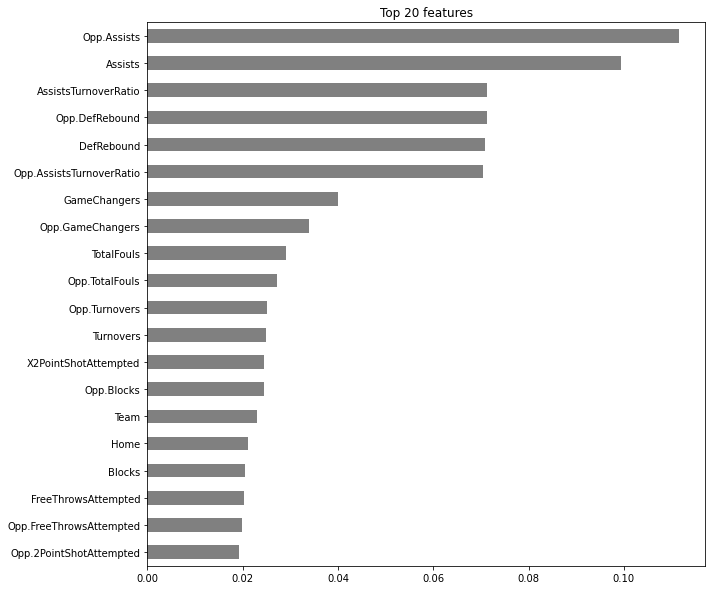

In [53]:
rf = gb.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [54]:
print('Training Accuracy:', gb.score(X_train, y_train))
print('Validation Accuracy:', gb.score(X_val, y_val))
print('Testing Accuracy:', gb.score(X_test, y_test))

Training Accuracy: 0.9115853658536586
Validation Accuracy: 0.8573170731707317
Testing Accuracy: 0.8463414634146341


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    GradientBoostingClassifier(random_state=42)
)


pipeline.fit(X_train, y_train);

In [70]:
#need to pickle model for vcsode
import joblib

In [72]:
filename_boost = 'finalized_nba_model.sav'

In [73]:
#saves for us to add model to vscode
joblib.dump(pipeline, filename=filename_boost)

['finalized_nba_model.sav']

In [56]:
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))
print('Testing Accuracy:', pipeline.score(X_test, y_test))

Training Accuracy: 0.9138211382113821
Validation Accuracy: 0.8613821138211382
Testing Accuracy: 0.85


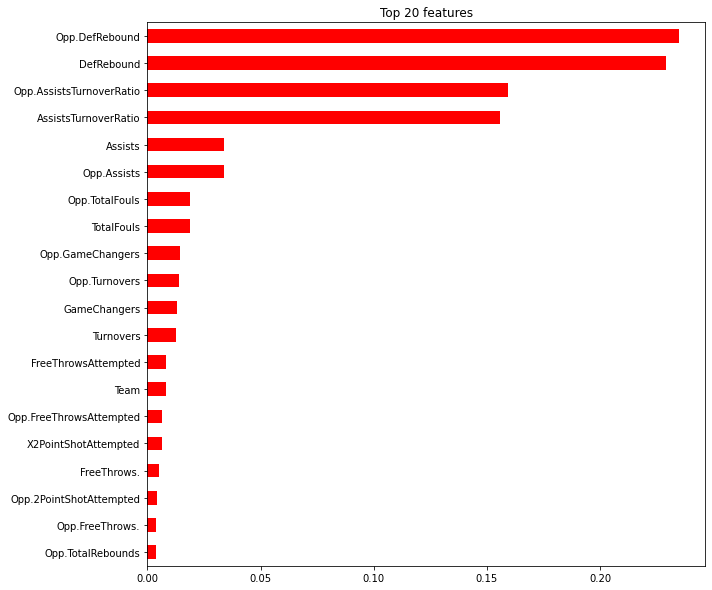

In [57]:
rf = pipeline.named_steps['gradientboostingclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='red');

In [58]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(pipeline,
                            X_val,
                            y_val,
                            random_state=42,
                            n_jobs=-1)

In [59]:
pi.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [60]:
p_importance = pd.DataFrame({'feature' : X_val.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=True).head(20)

,feature,weight,std
15,Opp.FieldGoalsAttempted,-0.000407,0.000257
4,FieldGoalsAttempted,-0.000407,0.000575
12,Blocks,-0.000407,0.000445
26,EastOpponent,0.000000,0.000000
1,Date,0.000000,0.000000
19,Opp.OffRebounds,0.000000,0.000000
39,HighFoul%,0.000000,0.000000
35,OppHighRebounds,0.000000,0.000000
40,Opp.HighFoul%,0.000000,0.000000
8,OffRebounds,0.000000,0.000000


Talk about the features in regards to basketball, explain what you are doing to a non techincal audience with both the model and what you are building

In [61]:
p_importance = pd.DataFrame({'feature' : X_val.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=False).head(24)

,feature,weight,std
29,Opp.DefRebound,0.143415,0.008168
28,DefRebound,0.141301,0.010337
38,Opp.AssistsTurnoverRatio,0.083171,0.004779
36,AssistsTurnoverRatio,0.078293,0.007638
25,Opp.TotalFouls,0.006423,0.001614
41,Opp.GameChangers,0.005203,0.001694
13,Turnovers,0.004715,0.001829
37,GameChangers,0.004390,0.000474
30,X2PointShotAttempted,0.004065,0.001763
24,Opp.Turnovers,0.003659,0.001431


In [62]:
import matplotlib.pyplot as plt

In [63]:

!pip install pdpbox
!pip install shap

     |████████████████████████████████| 34.0MB 1.2MB/s 
     |████████████████████████████████| 13.1MB 23.5MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758228 sha256=9d7c5c0bb45653c9907e630eeb2b451429f2408bcaf8b9a15dae10a478f9cf40
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


     |████████████████████████████████| 358kB 6.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491630 sha256=048444106e8bbe375188505984e78173cd0bb242d54806b51a84dcf4eb34b2c6
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [64]:
X_val.head()

,Team,Date,Home,Opponent,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%,HighRebounds,OppHighRebounds,AssistsTurnoverRatio,GameChangers,Opp.AssistsTurnoverRatio,HighFoul%,Opp.HighFoul%,Opp.GameChangers
4920,ATL,2016-10-27,True,WAS,88,26,18,0.778,14,52,28,13,7,21,19,94,20,18,0.722,12,40,25,14,4,19,20,True,False,38,28,62,74,False,False,False,False,1.333333,20,1.315789,False,False,18
4921,ATL,2016-10-29,False,PHI,85,20,23,0.652,6,47,31,11,7,12,14,80,18,15,0.733,4,39,16,9,5,20,20,True,False,41,35,65,62,False,False,False,False,2.583333,18,0.800000,False,False,14
4922,ATL,2016-10-31,True,SAC,79,30,47,0.617,17,43,24,11,6,13,20,75,23,19,0.684,6,38,26,10,6,19,34,False,True,26,32,49,52,False,False,False,False,1.846154,17,1.368421,False,True,16
4923,ATL,2016-11-02,True,LAL,85,32,29,0.793,10,37,30,10,1,18,19,90,22,20,0.900,11,42,24,11,9,15,25,False,True,27,31,53,68,False,True,False,False,1.666667,11,1.600000,False,False,20
4924,ATL,2016-11-04,False,WAS,83,25,36,0.639,10,47,22,12,3,18,24,80,20,35,0.800,11,46,13,7,3,19,23,True,False,37,35,58,60,False,False,False,False,1.222222,15,0.684211,False,False,10


In [65]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Turnovers', 'TotalFouls']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

(<Figure size 756x900 with 5 Axes>,
 {'pdp_inter_ax': {'_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0436ee0ed0>,
   '_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0436f624d0>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0436f63890>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0436f41fd0>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


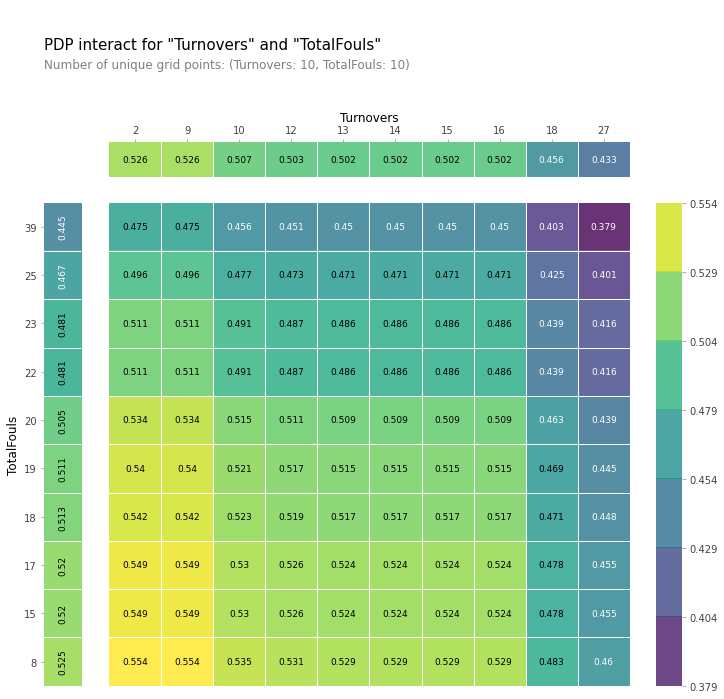

In [66]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features, plot_pdp=True)

**The Plot above shows how as Opponents Defense Rebounds begin to increase and their assist turnover ratio increase, the likelyhood of the home team winning decreases expontentially. This makes perfect sense in the game of basketball. As the Opponent accumulates more rebounds, the home team now has less chances to score. Rebounds protect teams from "second chance points", a second chance point means the other team has an opportunity of scoring again on the same possesion.**

(<Figure size 756x900 with 5 Axes>,
 {'pdp_inter_ax': {'_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f042e341b50>,
   '_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f042ec26f90>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f042e3d0510>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0436f7a790>})

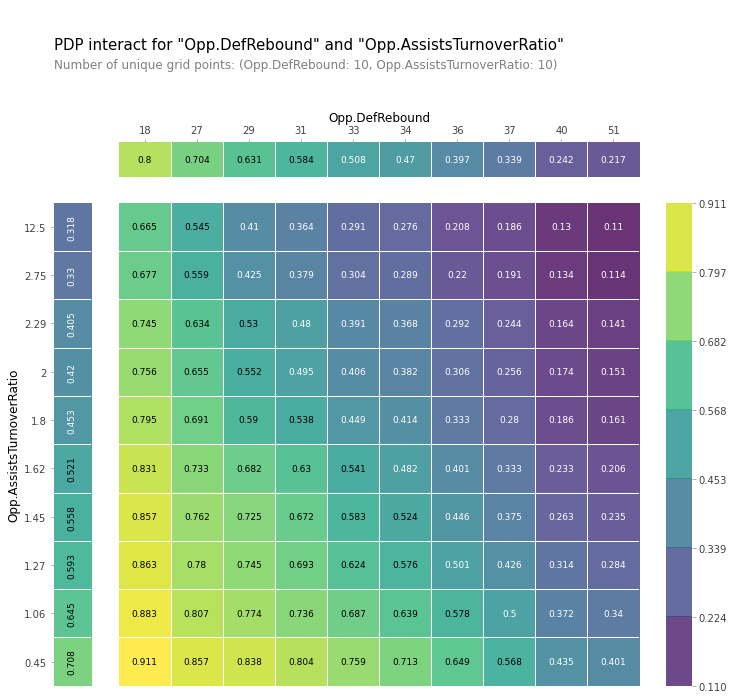

In [67]:
features = ['Opp.DefRebound','Opp.AssistsTurnoverRatio']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features, plot_pdp=True)

**The Y axis has a label "GameChangers", not this is not a normal term used to describe the features I implemented, however; I believe the name is correct. Steals and Blocks when playing defense give the other team momentum. You not only stopped the other team from scoring, but you didnt even give them the chance to score. When you steal the ball it is deflating to the person you stole it from. When you block someones shot, honestly, it just feels embarassing as the person who shot it. No surprise to me that as the opponents GameChangers increased, so did the Home teams chances of winning. Now what is interesting about this is how important fouls are. An opposing team can have a high accumulation of game changers, but even if they still have high fouls, the home teams chances of winning don't change that much**

(<Figure size 756x900 with 5 Axes>,
 {'pdp_inter_ax': {'_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f042e1b3110>,
   '_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f042ec8f250>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f042ec89c10>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0436dac550>})

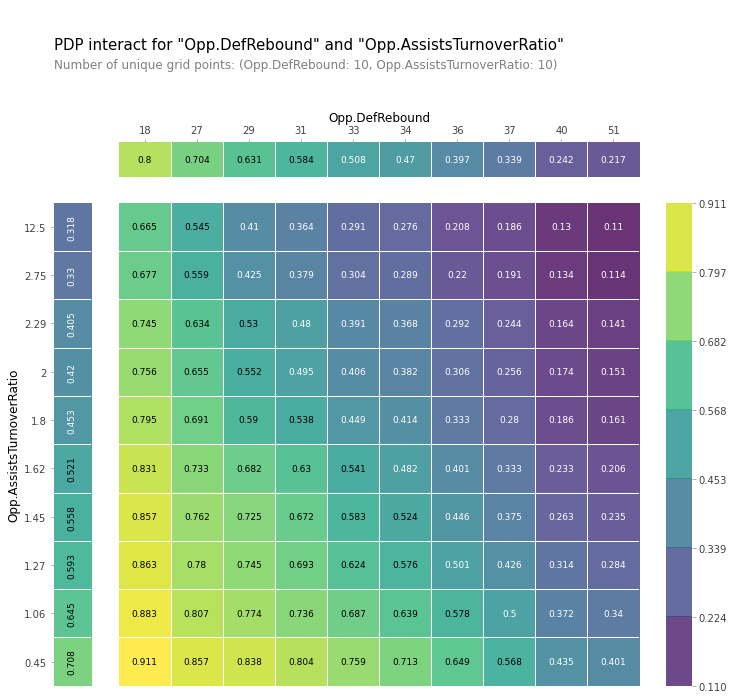

In [68]:
features = ['Opp.DefRebound','Opp.AssistsTurnoverRatio']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features, plot_pdp=True)

In [69]:
s = "sts"
print(len(s))

3
